In [1]:
import pandas as pd
import numpy as np
demand=pd.read_csv("IND_Demand.csv")
hourly=pd.read_excel("hourlyLoadDataIndia.xlsx")
monthly=pd.read_csv("india_monthly_electricity.csv")
print(demand.head())
print(" ")
print(hourly.head())
print(" ")
print(monthly.head())

         Date  Demand (TWh)
0  2019-01-01        109.52
1  2019-02-01         99.98
2  2019-03-01        116.03
3  2019-04-01        118.25
4  2019-05-01        128.39
 
             datetime  National Hourly Demand  Northen Region Hourly Demand  \
0 2019-01-01 00:00:00               118690.67                      33692.02   
1 2019-01-01 01:00:00               116029.23                      32534.39   
2 2019-01-01 02:00:00               114044.14                      31730.37   
3 2019-01-01 03:00:00               113648.97                      31529.25   
4 2019-01-01 04:00:00               116290.05                      32406.61   

   Western Region Hourly Demand  Eastern Region Hourly Demand  \
0                      38522.22                      13128.89   
1                      38071.09                      12737.53   
2                      37680.10                      12387.36   
3                      37747.37                      12301.12   
4                      38101.8

In [2]:
demand['Date']=pd.to_datetime(demand['Date'])
print(demand.head())

        Date  Demand (TWh)
0 2019-01-01        109.52
1 2019-02-01         99.98
2 2019-03-01        116.03
3 2019-04-01        118.25
4 2019-05-01        128.39


In [3]:
print("Missing values in the dataset:")
print(demand.isnull().sum())

Missing values in the dataset:
Date            0
Demand (TWh)    0
dtype: int64


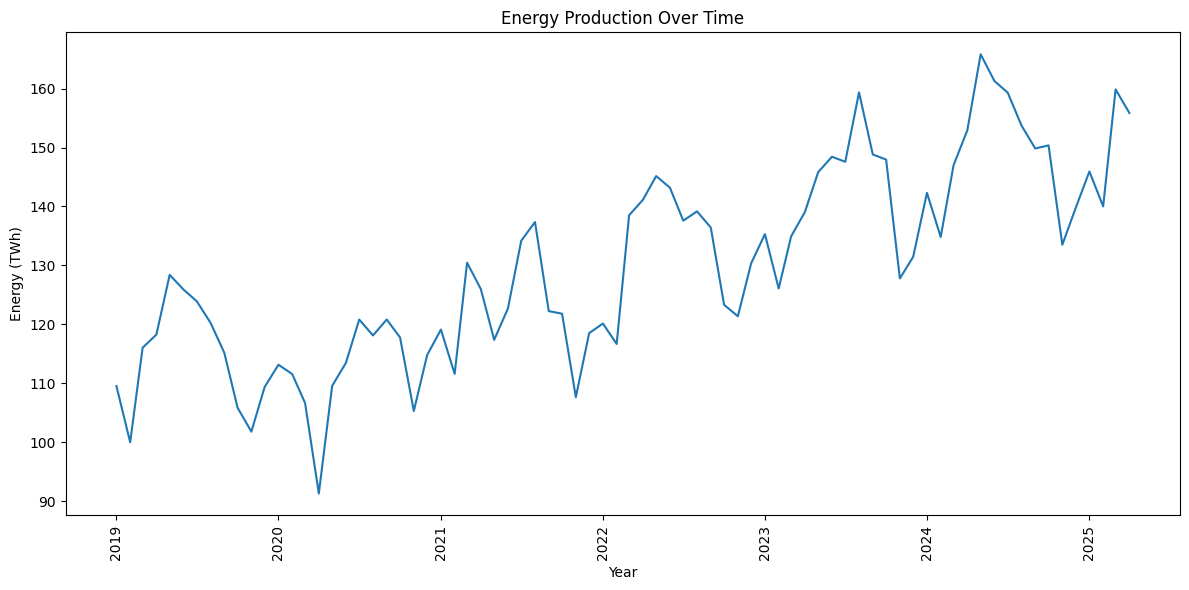

In [4]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(12, 6)) # Set the figure size for better readability
plt.plot(demand['Date'], demand['Demand (TWh)'])

# Add title and labels
plt.title('Energy Production Over Time')
plt.xlabel('Year')
plt.ylabel('Energy (TWh)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()